# How to code a quantum computer
Authors: Ben Jaderberg, Maria Violaris, Abhishek Agarwal

This workshop uses and was inspired by examples in the [Qiskit community tutorials](https://github.com/Qiskit/qiskit-community-tutorials). We have great appreciation for the original authors of those notebooks, and for releasing them open source to the commmunity.

In [5]:
import numpy as np
from qiskit import *
import qiskit.tools.jupyter
from qiskit.tools.monitor import job_monitor

%matplotlib inline

# Qubits

A bit is the building block of all classical computation. It can be represented by any system that has two possible states, such as whether a voltage is passing through a transistor or not, or whether there is milk in the fridge or not. Typically it's easier to work with transistors. If there is no voltage passing through the transistor we call this the 0 state. If there is some voltage passing through we call this the 1 state.

A **qubit** is the building block of all **quantum** computation. It can be represented by any **quantum** system that has two possible states. Because quantum mechanics is the physics that describes small things, typically qubits are built from small things like atoms. When that atom is sitting around doing nothing, we can call this the $|0\rangle$ state. If we shine a laser at the atom, it absorbs some of this light and goes into a higher energy state. We can call this the $|1\rangle$ state.

# Quantum logic gates

All quantum calculations are done by applying gates to qubits. One example is the $\hat{X}$ gate, which flips the state of the qubit. So if we apply the $\hat{X}$ gate to the $|0\rangle$ state, our qubit will be left in the $|1\rangle$ state. Similarly, if we apply the $\hat{X}$ gate to the $|1\rangle$ state, our qubit will be left in the $|0\rangle$ state. Mathematically we write this as:

$$\hat{X}|0\rangle = |1\rangle$$
$$\hat{X}|1\rangle = |0\rangle$$

Sometimes the $\hat{X}$ gate is called the "NOT" gate, as it has the same action as the NOT logic gate in classical computing.

# Quantum circuits 

Quantum circuits are the visual representation of any quantum algorithm. They contain classical bits, qubits, and logic gates. Ultimately, all of quantum computing involves writing code to create quantum circuits. With that in mind, lets make one!

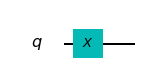

In [7]:
# Create a quantum circuit with 1 qubit. By default it is created in the |0> state.
qc = QuantumCircuit(1)

# Apply a X gate to qubit 0
qc.x(0)

# See what the circuit looks like
qc.draw(output='mpl')

This circuit implements exactly the equation $\hat{X}|0\rangle = |1\rangle$. If we were to measure the qubit (which we will do later), the result would be the $|1\rangle$ state.

## Task 1

* Create a circuit with two qubits.
* Apply a X gate to both of the qubits.
* What would be the output state? Hint: for two qubits, we write the initial state as $|00\rangle$.

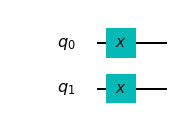

In [3]:
# Create a quantum circuit with 2 qubits. By default it is created in the |00> state.
qc = QuantumCircuit(2)

# Apply a X gate to qubit 0 and qubit 1.


# See what the circuit looks like
qc.draw(output='mpl')

## Task 2

* Create a circuit with five qubits.
* Apply two X gates to the first qubit
* Apply one X gate to all the other qubits
* What would be the output state?

In [43]:
# Create a quantum circuit with 5 qubits. By default it is created in the |00000> state.


# Apply the gates


# See what the circuit looks like


# Superposition

So far we have shown that qubits have two states, just like classical bits. This means that in theory, quantum computers can do everything a classical computer can do! However, qubits have an extra trick up their sleeve. They can exist in the following state:

![title](images/equal_superposition.png)


This is known as a **superposition** state, where the qubit is neither just $|0\rangle$ or $|1\rangle$! Instead, the qubit exists somewhere in between, as a combination of some part of each state.

The number in front of each state is known as the **amplitude**. When we measure a qubit, we break all of its quantum effects and observe it as either $|0\rangle$ or $|1\rangle$. The probability of observing it in the $|0\rangle$ state is given by the amplitude squared. This is why in the above example, there is a $\left(\frac{1}{\sqrt{2}}\right)^2 = \frac{1}{2}$ chance of observing the qubit in either the $|0\rangle$ or $|1\rangle$ state.

We can put a qubit in a superposition with **any** probability of being in each state, such as 80%-20% or 51%-49%. This, alongside complex amplitudes, won't be covered in this workshop but are important parts of quantum algorithms.

# The Hadamard gate

As it turns out, the superposition state $|\psi\rangle = \left(\frac{1}{\sqrt{2}}|0\rangle+\frac{1}{\sqrt{2}}|1\rangle\right)$, with 50% probability of each state, is especially useful in quantum computing. Because of this, it has its own logic gate to create such a state known as the Hadamard gate:

$$\hat{H}|0\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$$

Let's use this gate, and check that the state really does give $|0\rangle$ 50% of the time and $|1\rangle$ 50% of the time!

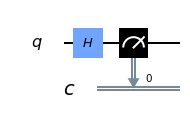

In [8]:
# Create a quantum circuit with 1 qubit and 1 classical bit.
qc = QuantumCircuit(1, 1)

# Apply a H gate to qubit 0
qc.h(0)

# Make a measurement of the qubit, and record the result on a classical bit
qc.measure(0, 0)

# See what the circuit looks like
qc.draw(output='mpl')

In [9]:
# Choose what device to run our circuit on
quantum_simulator = Aer.get_backend('qasm_simulator')

# Run the circuit 1000 times
job = execute(qc, quantum_simulator, shots=1000)

# Find out how many times we measured 0 and how many times we measured 1
results = job.result()
counts = results.get_counts(qc)
print(counts)

{'1': 504, '0': 496}


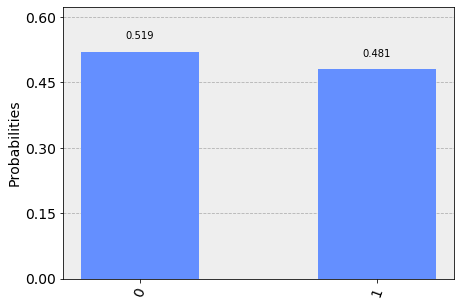

In [6]:
# Plot this on a histogram
from qiskit.visualization import plot_histogram

plot_histogram(counts)

You'll notice that we may not have actually got $|0\rangle$ and $|1\rangle$ exactly 50% of the time! This is exactly the same as flipping a coin 1000 times, due to the random nature of probability you may not get heads exactly 500 times.

## Task 3

* Create a circuit with two qubits and two classical bits.
* Apply a Hadamard gate to each qubit.
* Measure each of the qubits.

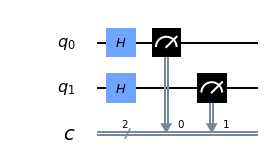

In [19]:
# Create a quantum circuit with 2 qubits and 2 classical bits.


# Apply a H gate to qubit 0 and qubit 1


# Make a measurement of the qubit 0 on classical bit 0, and qubit 1 on classical bit 1.


# See what the circuit looks like
qc.draw(output='mpl')

The question remains, what would be the final state of this circuit? First we're going to calculate this mathematically, which may be something you're interested in learning or have experience in. If not, feel free to skip to the final result.

-----
Previously we learnt that when we apply a Hadamard gate to the $|0\rangle$ state, it acts like:

$$\hat{H}|0\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$$

If we want to write the left hand side of this equation for Task 3, it would look like:

$$\hat{H}_{0}\hat{H}_{1}|0_{0}\rangle|0_{1}\rangle = \quad ?$$

The subscripts $\hat{H}_{0}$ and $\hat{H}_{1}$ are just telling you that these gates are acting on qubit 0 and qubit 1 respectively. Applying the rule we know from before we get:

$$\hat{H}_{0}\hat{H}_{1}|0_{0}\rangle|0_{1}\rangle = \frac{1}{\sqrt{2}}\left(|0_{0}\rangle+|1_{0}\rangle\right)\frac{1}{\sqrt{2}}\left(|0_{1}\rangle+|1_{1}\rangle\right)$$

To solve this uses the same maths as multiplying out brackets. You may remember this from school - such as solving $(x+2)(x+2)$.

$$\hat{H}_{0}\hat{H}_{1}|0_{0}\rangle|0_{1}\rangle = \frac{1}{2}\left(|0_{0}\rangle|0_{1}\rangle + |0_{0}\rangle|1_{1}\rangle + |1_{0}\rangle|0_{1}\rangle + |1_{0}\rangle|1_{1}\rangle\right)$$

-------------
**FINAL RESULT** Often for simplicity we remove the subsripts on qubits and also squash them together into one bracket. So finally we have:

$$\hat{H}_{0}\hat{H}_{1}|00\rangle = \frac{1}{2}\left(|00\rangle + |01\rangle + |10\rangle + |11\rangle\right)$$

When we apply a Hadamard gate to two qubits, we have **4 possible outcomes for the final result**. Each one can occur with probability $\left(\frac{1}{2}\right)^2 = \frac{1}{4}$ and most interestingly, it is truly random which one we will be left with. This provides inspiration for our next challenge, but let's quickly run the circuit from before to verify our result.

In [17]:
# Run the circuit 1000 times
job = execute(qc, quantum_simulator, shots=1000)

# Find out how many times we measured 0 and how many times we measured 1
results = job.result()
counts = results.get_counts(qc)
print(counts)

{'00': 250, '10': 277, '01': 234, '11': 239}


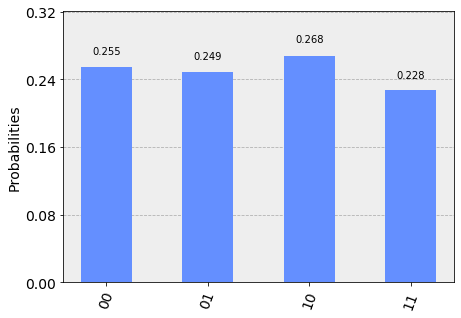

In [16]:
# Plot this on a histogram
plot_histogram(counts)

Excellent! If the task was completed correctly, we should see 4 possible outcomes each with roughly equal probability. 

## The quantum 8-ball

So far we have learnt that qubits can be placed into a superposition using the Hadamard gate. When we place one qubit into a superposition there are 2 possible outcomes. When we place two qubits in a superposition, there are 4 possible outcomes. If you can see the pattern, for $n$ qubits it is possible to have $2^n$ possible outcomes! This is one of the advantages that quantum algorithms leverage over classical ones!

You're going to create a quantum 8-ball, one of these things that are used to solve life's hardest problems. 

![image.png](images/8_ball.png)

Because the outcome of a quantum superposition is truly random, this will be the only truly random 8-ball in the world!

## Task 4

* Create a circuit with three qubits and three classical bits
* Apply a Hadamard gate to each qubit.
* Measure each of the qubits.

In [ ]:
# Create a quantum circuit with 3 qubits and 3 classical bits.


# Apply a H gate to each of the qubits


# Make a measurement of each qubit


# See what the circuit looks like


In [44]:
# Define a function which will give us advice based on each of the possible 8 outcomes

def answer(result):
    for key in result.keys():
        state = key
    print('The Quantum 8-ball says:')
    if state == '000':
        print('It is certain.')
    elif state == '001':
        print('Without a doubt.')
    elif state == '010':
        print('Yes - definitely.')
    elif state == '011':
        print('Most likely.')
    elif state == '100':
        print("Don't count on it.")
    elif state == '101':
        print('My reply is no.')
    elif state == '110':
        print('Very doubtful.')
    else:
        print('Concentrate and ask again.')

In [45]:
# Run the circuit 1 time
job = execute(qc, quantum_simulator, shots=1)

# Retrieve the output
result = job.result().get_counts(qc)
answer(result)

The qubits were measured in state 10
The Quantum 8-ball says:
Concentrate and ask again.


If all has gone well, you should recieve an answer back from the 8-ball when you run the above code block. Try running it several times, one after the other, and see if you get different answers.

Dissapointingly, whilst the results of your 8-ball may look random, they are not! This is because we are still running on a classical computer pretending to be quantum computer. Let's make a change to that.

## Task 5

* Get (or create) your IBMQ credentials (https://qiskit.org/documentation/install.html#install-access-ibm-q-devices-label)
* Choose a real quantum computer
* Run the 8-ball on a real quantum computer

In [6]:
# Once you have an IBMQ account, paste your API token below instead of the text which says MY_API_TOKEN
IBMQ.save_account('MY_API_TOKEN')

# Now you have a saved account, lets load it
IBMQ.load_account()

# Each account has many "providers", which can give access to different tiers of hardware.
provider = IBMQ.get_provider(group='open')

In [7]:
# Find the least busy real quantum computer
from qiskit.providers.ibmq import least_busy

quantum_computer = least_busy(provider.backends(simulator=False))

quantum_computer

<IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>

You should see a pop-up above of the quantum computer that has been chosen. This is displaying real time information about the status of individual qubits and the architecture of the machine!

Now we have our quantum hardware, lets re-run the 8-ball

In [40]:
# Run the circuit 1 time, but this time on the real quantum computer
job = execute(qc, quantum_computer, shots=1)

job_monitor(job, interval = 2)

Job Status: job has successfully run


Unfortunately, it is likely that you are not the only person trying to use this quantum computer at the moment, so you will have to sit in a queue. Keep an eye on the job status printed above, and when you see `Job Status: job has successfully run`, then carry on. If it's taking a while, feel free to skip ahead and come back to this later.

In [41]:
# Retrieve the output
result = job.result().get_counts(qc)
answer(result)

The Quantum 8-ball says:
Concentrate and ask again.


**Congratulations!** You just ran your first quantum algorithm on a real quantum computer.

# Entanglement 

Famously known as 'spooky action at a distance' (Einstein's attempt to discredit the whole idea), entanglement has been used to develop quantum information theory; conjecture an origin of gravity; and even propose an arrow of time. Here we are going to learn how to create entanglement and see its very non-classical consequences.

So what actually is entanglement? Let's entangle some qubits and come back to this question. To do this, we are going to need a new gate called the controlled-X (CX) gate. This is also often called the controlled-NOT (CNOT) gate, so you might see that name used too.

Unlike the X and H gates, the CX acts on two qubits. One qubit is the 'control' qubit, and the other is the 'target' qubit. 

- If the control is in the state $|0\rangle$, then nothing happens. 

- If the control is in the state $|1\rangle$, then an X gate is applied to the target qubit. This flips the target qubit from $|0\rangle$ to $|1\rangle$ or vice-versa.

Let's make one! 


In [1]:
# Create a quantum circuit with 2 qubits. By default it is created in the |00> state.


# Apply a CX gate with qubit 0 as the control, and qubit 1 as the target.
qc.cx(0, 1)

# Check what your circuit looks like! 
qc.draw(output='mpl')

NameError: name 'qc' is not defined

Since both qubits started in the $|0\rangle$ state, what state should the qubits have ended up in? 

The control was $|0\rangle$, so it leaves the target qubit as it is - which is also $|0\rangle$! So our C-NOT gate hasn't done anything exciting, and the overall state was $|00\rangle$ before and after the gate. But not for long... 

## Task 6

* Create a circuit with two qubits.
* Apply a Hadamard gate to qubit 0.
* Apply a CX gate with qubit 0 as the control and qubit 1 as the target.
* Can you work out what state the qubits will end up in?

In [2]:
# Create a quantum circuit with 2 qubits.


# Apply a H gate to qubit 0.


# Apply a CX gate with qubit 0 as the control, and qubit 1 as the target.


# See what the circuit looks like
qc.draw(output='mpl')

NameError: name 'qc' is not defined

Let's work out what happens with the circuit we just created. This can get a little complicated, so please don't by shy to ask a demonstrator to step through the calculation with you.

------
We started with the state $|0\rangle|0\rangle = |00\rangle$. Then we applied a Hadamard to qubit 0:

$$\hat{H_0}|00\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)|0\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|10\rangle$$

Now we have a **superposition** of two possible states. Half the time our 2 qubits are in the $|00\rangle$ state and half the time are qubits are in the $|10\rangle$ state.

Now we apply a CX gate with qubit 0 as the control, and qubit 1 as the target. However, **our control qubit is in a superposition**, so what happens?

Half the time, when the control is $|0\rangle$, the CX leaves the target as it is. The other half of the time, when the control is $|1\rangle$, the CX applies an X gate to the target. This flips the target from a $|0\rangle$ to a $|1\rangle$.

$$ \hat{CX}\left[\frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|10\rangle \right] = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle$$

---

**FINAL RESULT** We end up with the state $\frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle$, which is so important in quantum information is has its own name: the 'Bell state'. But why is this state "entangled"? What does that mean?

Let's imagine an experiment where you measure the first of the two qubits. Suppose you measure it to be $|0\rangle$. Looking at our final result, this means that we must be in the 50% of the time where the whole system ends up in the state $|00\rangle$. As such, without having looked at the second qubit, we know it is in the state $|0\rangle$.

Similarly, if we measure the first qubit to be $|1\rangle$, then we must be in the 50% of the time where the system is in the state $|11\rangle$. As such, without having looked at the second qubit, we know it is in the state $|1\rangle$. 

What is remarkable about entanglement is that **by measuring one qubit, we are able to gain information about its entangled partner** without having ever touched it! Despite the fact that the final states $|00\rangle$ and $|11\rangle$ are entirely random and were never determined, the second qubit seems to "know" the outcome of the first one. This works even when the qubits are seperated by large distances, even if we placed them on opposite sides of the universe! This is what unsettled many physicists in the early 20th century, including Einstein!

After that groundbreaking discovery, let's check our maths is correct with some experiments.

## Task 7a

* Create a circuit with two qubits and two classical bits.
* Apply a Hadamard gate to qubit 0.
* Apply a CX gate with qubit 0 as the control and qubit 1 as the target.
* Measure each of the qubits

In [ ]:
# Create a quantum circuit with 2 qubits and 2 classical bits.


# Apply a H gate to qubit 0.


# Apply a CX gate with qubit 0 as the control, and qubit 1 as the target.


# Make a measurement of each qubit


Now run this circuit on a simulated quantum computer, and extract / plot the results. For guidance, we did earlier in Task 2 and 3.

## Task 7b

* Run the circuit on the quantum simulator.
* Extract and plot the results.

In [ ]:
# Run the circuit 1000 times



# Find out how many times we measured 0 and how many times we measured 1



# Plot this on a histogram


Just as we predicted - the system is measured as either $|00\rangle$ or $|11\rangle$ - therefore the qubits are always in the same state!

Can you predict what will happen when we try this on a real quantum computer? Let's give it a go.

In [ ]:
# Find the least busy real quantum computer
quantum_computer = least_busy(provider.backends(simulator=False))

# Run the circuit 1000 times, on a real quantum computer.
job = execute(qc, quantum_computer, shots=1000)

job_monitor(job, interval = 2)

In [3]:
# Extract and plot the results
counts = job.result().get_counts(qc)
plot_histogram(counts)

NameError: name 'job' is not defined

Congratulations - you have just programmed the entanglement of two real qubits on one of IBM's quantum computers. When you think about how crazy this phenomenon is, so much that Einstein refused to believe its existence, that's pretty amazing. 

But something on this histogram doesn't look quite right. There are some unwanted states - $|01\rangle$ and $|10\rangle$ shouldn't be possible. However, the occur because IBM's quantum computers are not perfect, indicating one of the major issues with quantum computing on real devices - NOISE! We will explore the wonders of noise in the next section. 

# Noise

Previously in this workshop, we have presented the theory of quantum computing, exploring the effects of different gates and what quantum states they create. However, all of what you have learnt is only in the ideal case.

In reality, qubits can be incredibly fragile and are often difficult to perfectly control when we apply gates to them. Famously, in the case of superconducting qubits, they need to be cooled to **-273C**! This means that even the coldest places on Earth would prove too hot for these qubits.

So what happens? When the environment (such as heat) interacts with the qubits, it can give them energy which changes the state they are in. This is similar to how adding heat can change the state of water (boiling), or popcorn (popping). In terms of quantum computing, this means that in reality:

* Qubits may not be able to mantain their superposition. The environment interacting with a superposition can act as a "measurement" and cause it to lose its quantum effects.
* Quantum gates may not do exactly what they're supposed to. Sometimes a gate won't act at all, or will act twice on a qubit, or will even behave like a different gate.
* When we measure qubits, sometimes we actually see the wrong answer. So when we would measure a $|0\rangle$ state, we instead see a $|1\rangle$.

The presence of noise means that we can't always trust that a quantum computer is always doing what we ask it to do. In the following exercise, we will see the effects of noise in action.

## Quantum emojis

As we leant at the beginning, anything that can be done with classical bits can be done with qubits. This allows us to use quantum computers for extremely important classical tasks, such as printing smiley faces.

When broken down, all smiley faces are just a combination of punctuation, which can be represented in binary by a string of 0s and 1s. For example, bit string corresponding to the emote ;) is:
    
    ;)  =  '01110110101001'

where the first 7 bits '0111011' correspond to ';' and the last 7 bits '0101001' correspond to ')'. To start with, let's use our qubits like classical bits and create this emoji.

## Task 8
* Create a circuit with 14 quantum bits and 14 classical bits.
* Add X gates to the qubits that need flipping.
* Measure each of the qubits

In [5]:
# Create a quantum circuit with 14 qubits and 14 classical bits. Remember, they all start as |0>.


# Apply X gates to the appropriate qubits. It might be easier to use a for loop if you know how.


# Make a measurement of each qubit. A for loop may help again!


# See what the circuit looks like
qc.draw(output='mpl')


01110110101001


Let's check that we have created the bitstring we want:

In [ ]:
# Run the circuit once
job = execute(qc, quantum_simulator, shots=1)

# Retrieve and print the output
result = job.result().get_counts(qc)
bit_string = list(result)[0] # the bit string is the first (and only) key of the result dictionary

# In the output bit string, the bits are ordered from right to left 
# So, we need to reverse the output to get the desired bit string
bit_string = ''.join(reversed(bit_string))
print(bit_string)

To print the emoji, we need to convert the bit string ('0011101100101001') to an ASCII character. Run the following code and ensure it prints ';)'

In [4]:
# Convert the first and second half of the bitstring(base 2) to an integer and convert that to an ASCII character
char1 = chr(int( bit_string[0:7] ,2)) 
char2 = chr(int( bit_string[7:14] ,2))
print(char1+char2)

NameError: name 'bit_string' is not defined

Of course, just writing a bit string in some qubits isn't very quantum. Instead we can use entanglement and Hadamard gates to prepare a superposition of two different emoticons! We choose ;) and 8), which correspond to the bit strings

    8)  =  '01110000101001'
    ;)  =  '01110110101001'

Note that these strings differ only on bits 5 and 6, which for the first smiley is '00' and for the second smiley is '11'. Therefore, we need to prepare qubits 5 and 6 to be either $|00\rangle$ or $|11\rangle$, which is the Bell state you created earlier!

Let's try to create a circuit that creates a superposition of these two smileys. The only difference between such a circuit and our previous circuit will be creating the Bell state on qubits 5 and 6.

## Task 9
* Create a circuit with 14 quantum bits and 14 classical bits
* Add X gates to appropriate qubits
* Use H and cx to create the superposition of '00' and '11'
* Measure all qubits

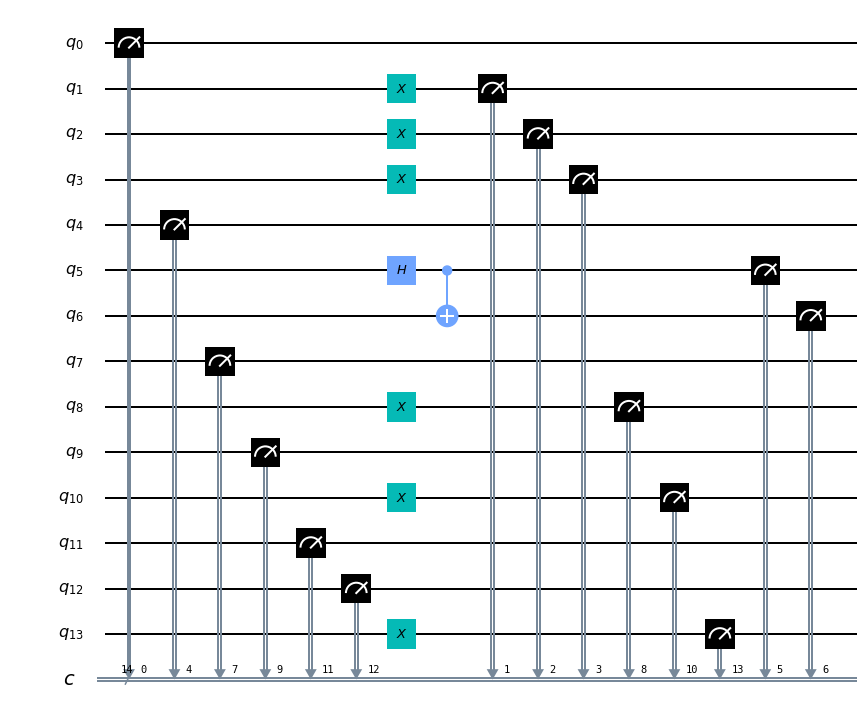

In [20]:
# Create a quantum circuit with 14 qubits and 14 classical bits.
qc = QuantumCircuit(14,14)

# Apply a X gate to appropriate qubits
for x in [1,2,3,8,10,13]:
    qc.x(x)

# Create a Bell state using qubits 5 and 6. If you're stuck, look at the gates that were used in Task 6 to do this.


# Make a measurement of each qubit
for i in range(14):
    qc.measure(i,i)

# See what the circuit looks like
qc.draw(output='mpl')

If we created the superposition correctly, over 1000 measurements we should get each smiley with roughly 50% probability.

In [21]:
# Run the circuit 1000 times
job = execute(qc, quantum_simulator, shots=1000)

# Retrieve and print the output
result = job.result().get_counts(qc)

for string, frequency in result.items():
    bit_string = ''.join(reversed(string))

    char1 = chr(int( bit_string[0:7] ,2)) 
    char2 = chr(int( bit_string[7:14] ,2))
    
    print(char1 + char2 + ' : ' + str(frequency/1000))

8) : 0.49
;) : 0.51


If all went well, ';)'  and '8)' should have been printed out along with their probabilities.

This gives us a list of characters and probabilities. But that isn't very fun. For something more visual, we use matplotlib to create an image in which all the smileys included in the result are printed on top of each other.

The transparency of each character is set to the fraction of shots for which that result occurred. Run the following code to see this in action.

8) : 0.49
;) : 0.51


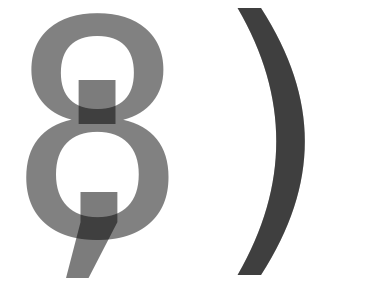

In [22]:
import matplotlib.pyplot as plt

def show_emoji_superposition(result):
    plt.rc('font', family='monospace')
    for string, frequency in result.items():
        bit_string = ''.join(reversed(string))

        char = chr(int( bit_string[0:7] ,2))
        char += chr(int( bit_string[7:14] ,2))

        prob = frequency/ 1000

        # create plot with all characters on top of each other with alpha given by how often it turned up in the output
        plt.annotate( char, (0.5,0.5), va="center", ha="center", color = (0,0,0, prob ), size = 300)

        print(char + ' : ' + str(frequency/1000))

    plt.axis('off')
    plt.show()
    
show_emoji_superposition(result)

This was the result of running the circuit on a simulated quantum computer. Now let's run it on a real quantum computer, but most importantly, to study the effect of noise. **How do you think noise will affect the smileys we get at the end?**.

In [ ]:
# Get the least busy quantum computer with at least 14 qubits
quantum_computer = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 14
                                    and not x.configuration().simulator
                                    and x.status().operational==True))
# Run the circuit
job = execute(qc, quantum_computer, shots=1024)

# Retrieve and print the output
result = job.result().get_counts(qc)

# Show superposition
show_emoji_superposition(result)


The big difference here is that there are many different characters, smiley faces and not, that are unintended! Despite the fact that we presented a quantum circuit to create two possible states, we have ended up with literally hundreds of measured states. This really showcases the noise present in current quantum computers and the difficulty of how this noise affects our calculations.

And there you have it. A program to take one of the world's most advanced devices and make a smiley with it. A quantum smiley! To do so we have used all of the skills developed along the way, including both superposition and entanglement.

# End of workshop, final words

Thank you very much for your attention and time completing our workshop. We hope that by the end of this, you have the skills to independently:

* Create quantum circuits with qubits classical bits
* Use quantum logic gates in your circuits, which will allow you to build any quantum algorithm (even the very famous [Shor's algorithm](https://en.wikipedia.org/wiki/Shor%27s_algorithm)).
* Understand the phenomena of quantum superposition and entanglement, and how they are created.
* Run, collect and interpret the results of experiments on real quantum computers

If you have reached this point and there is time left, please take the opportunity to speak to other attendees, or ask the demonstrators about any questions you have. Otherwise, feel free to look at the extension section on the quantum teleportation algorithm. 

# More, I want more!

The truth is, quantum computing is an enormous and complicated field, which means there are many interesting topics we haven't touched here. If you enjoyed the format of this workshop, and want to learn more, then the Qiskit tutorials are a great next step:

### Official Qiskit tutorials https://github.com/Qiskit/qiskit-iqx-tutorials

### Qiskit community tutorials https://github.com/Qiskit/qiskit-community-tutorials

### Lecture notes

There are severall excellent lecture notes about quantum computing available for free. These are aimed at advanced undergraduate level for those in mathematical sciences:

- Caltech http://www.theory.caltech.edu/people/preskill/ph229/

- Berkeley https://inst.eecs.berkeley.edu/~cs191/fa14/

# Extension: Quantum teleportation